In [140]:
import numpy as np
from numpy import sin
import holidays
from numpy.linalg import inv
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Реализация линейной регрессии

\begin{equation} 
y_{i} = f(\omega, x_{i}) + \varepsilon_{i}
\end{equation}

Нужно показать корректность нахождения параметров $\omega$ с помощью метода наименьших квадратов

Построим зависимость цены нарезного хлеба от времени

In [141]:
data = pd.read_csv("WhiteBreadPrices.csv")
data.head()

,0.27723,0
0,0.29703,0.005155
1,0.21782,0.010309
2,0.12871,0.015464
3,0.31683,0.020619
4,0.34653,0.025773


In [142]:
x = data.iloc[:, 1]
y = data.iloc[:, 0]

In [143]:
def get_weights(A, y):
    return inv(A.T@A)@A.T@y

In [144]:
X = np.linspace(0, 1, x.shape[0])

### Одномерная регрессия

SSE = 2.73


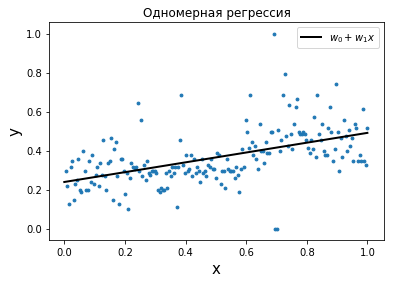

In [145]:
ones = np.ones(x.shape)
A = np.column_stack((ones, x))
w = get_weights(A, y)
Y = A@w
r = y - Y
print("SSE = {:0.2f}".format(r.T@r))
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='', s=8)
plt.plot(X, Y, color='black', linewidth=2, \
         label='$w_{0}+w_{1}x$')
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title("Одномерная регрессия")
plt.legend()
plt.show()

### Полиномиальная регрессия

SSE = 2.50


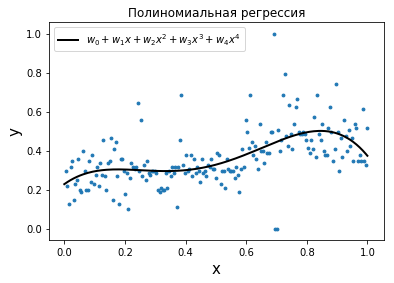

In [146]:
A = np.column_stack((ones, x, x ** 2, x ** 3, x ** 4))
w = get_weights(A, y)
Y = A@w
r = y - Y
print("SSE = {:0.2f}".format(r.T@r))
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='', s=8)
plt.plot(X, Y, color='black', linewidth=2, \
         label='$w_{0}+w_{1}x+w_{2}x^{2}+w_{3}x^{3}+w_{4}x^{4}$')
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title("Полиномиальная регрессия")
plt.legend()
plt.show()

### Криволинейная регрессия

SSE = 2.50


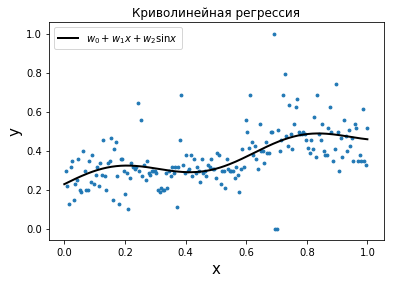

In [147]:
A = np.column_stack((ones, x, np.sin(10*x)))
w = get_weights(A, y)
Y = A@w
r = y - Y
print("SSE = {:0.2f}".format(r.T@r))
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='', s=8)
plt.plot(X, Y, color='black', linewidth=2, \
         label='$w_{0}+w_{1}x+w_{2}{\sin x}$')
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title("Криволинейная регрессия")
plt.legend()
plt.show()

## Вторая часть

Построим зависимость энергопотребления от температуры и времени


In [148]:
data = pd.read_excel("EnergyConsumption.xls")
print("Данные по энергопотреблению за {}".format(data['Date'].max()-data['Date'].min()))
data.head()

Данные по энергопотреблению за 364 days 23:00:00


,Date,WeekDay,Hour,ConsumprionMWtH,TemperatureC
0,2005-01-01 00:00:00,6,00:00:00,1289.617859,-10.676569
1,2005-01-01 01:00:00,6,01:00:00,1265.573853,-12.041959
2,2005-01-01 02:00:00,6,02:00:00,1273.188232,-13.198006
3,2005-01-01 03:00:00,6,03:00:00,1279.703979,-13.999279
4,2005-01-01 04:00:00,6,04:00:00,1292.839539,-14.782819


In [149]:
h = data['Hour'].apply(lambda x: x.hour)
d = data['WeekDay']
m = data['Date'].apply(lambda x: x.dayofyear)
t = data['TemperatureC']
y = data['ConsumprionMWtH']
X = np.linspace(0, 1, y.shape[0])

Отнормируем данные

In [150]:
# norm it
h = h/h.max()
d = d/d.max()
m = m/m.max()
t = t/t.max()
y = y/y.max()

No handles with labels found to put in legend.


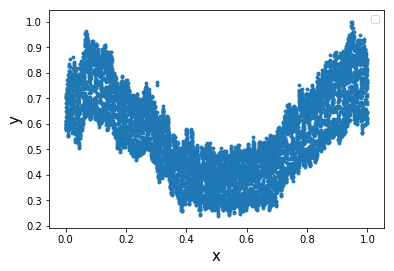

In [151]:
plt.scatter(X, y, label='', s=8)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.legend()
plt.show()

Использование праздников в качестве признака показало свою эффективность


In [152]:
for holiday in holidays.Russia(years = 2005).items(): 
    print(holiday) 

(datetime.date(2005, 1, 1), 'Новый год')
(datetime.date(2005, 1, 2), 'Новый год')
(datetime.date(2005, 1, 3), 'Новый год')
(datetime.date(2005, 1, 4), 'Новый год')
(datetime.date(2005, 1, 5), 'Новый год')
(datetime.date(2005, 1, 6), 'Новый год')
(datetime.date(2005, 1, 7), 'Православное Рождество')
(datetime.date(2005, 1, 8), 'Новый год')
(datetime.date(2005, 2, 23), 'День защитника отечества')
(datetime.date(2005, 3, 8), 'День женщин')
(datetime.date(2005, 5, 1), 'Праздник Весны и Труда')
(datetime.date(2005, 5, 9), 'День Победы')
(datetime.date(2005, 6, 12), 'День России')
(datetime.date(2005, 11, 4), 'День народного единства')


In [153]:
def is_holiday(day):
    russia_holidays = holidays.Russia()
    day = day.date()
    if day in russia_holidays:
        return 1
    else:
        return -1

In [158]:
ones = np.ones(y.shape[0])
holiday = data['Date'].apply(lambda x: is_holiday(x))
omega = 2*np.pi/(2/365)
A = np.column_stack((ones, h, h**2, np.arcsinh(h), np.log(h+1),\
                     sin(omega*h + 0.2), sin(omega*h/2), sin(omega*h*4),\
                     d, d**2, sin(327*d), sin(250*d),np.sin(29*d),\
                     m, m**2, m**3, sin(m), np.log(m),          \
                     t, t**3, np.sinh(t), np.log(abs(t)),\
                     holiday,
                     ))
w = get_weights(A, y)
Y = A@w
r = y - Y
print(r.T@r)

11.457613451917553


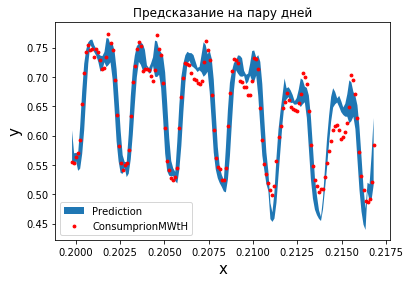

In [157]:
x3 = X[1750:1900]
y3 = y[1750:1900]
Y3 = Y[1750:1900]
results_std = list()
for i in range(1750, 1900):
    results_std.append(np.std(y[i-2:i+2]))
plt.fill_between(x3,Y3 - results_std,Y3 + results_std, label='Prediction')
plt.scatter(x3, y3, s=8, color='red')
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title("Предсказание на пару дней")
plt.legend()
plt.show()